In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c us-patent-phrase-to-phrase-matching

100% 682k/682k [00:00<00:00, 839kB/s]
100% 682k/682k [00:00<00:00, 838kB/s]


In [ ]:
!mkdir data

In [ ]:
! unzip us-patent-phrase-to-phrase-matching.zip -d data/

Archive:  us-patent-phrase-to-phrase-matching.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
from pathlib import Path

In [ ]:
path = Path('/content/data')

In [ ]:
!ls {path}

sample_submission.csv  test.csv  train.csv


In [ ]:
import pandas as pd

df = pd.read_csv(path/'train.csv')
df

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50
36471,756ec035e694722b,wood article,wooden material,B44,0.75


In [ ]:
df.describe(include='object')

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,37d61fd2272659b1,component composite coating,composition,H01
freq,1,152,24,2186


In [ ]:
df['input'] = 'TEXT1: ' + df.context + '; TEXT2: ' + df.target + '; ANC1: ' + df.anchor
df

,id,anchor,target,context,score,input
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,TEXT1: A47; TEXT2: abatement of pollution; ANC...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,TEXT1: A47; TEXT2: act of abating; ANC1: abate...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,TEXT1: A47; TEXT2: active catalyst; ANC1: abat...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,TEXT1: A47; TEXT2: eliminating process; ANC1: ...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,TEXT1: A47; TEXT2: forest region; ANC1: abatement
...,...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00,TEXT1: B44; TEXT2: wooden article; ANC1: wood ...
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50,TEXT1: B44; TEXT2: wooden box; ANC1: wood article
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50,TEXT1: B44; TEXT2: wooden handle; ANC1: wood a...
36471,756ec035e694722b,wood article,wooden material,B44,0.75,TEXT1: B44; TEXT2: wooden material; ANC1: wood...


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 38.1 MB/s 
     |████████████████████████████████| 212 kB 79.3 MB/s 
     |████████████████████████████████| 182 kB 80.1 MB/s 
     |████████████████████████████████| 132 kB 77.2 MB/s 
     |████████████████████████████████| 127 kB 76.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 33.2 MB/s 
     |████████████████████████████████| 7.6 MB 26.7 MB/s 


In [ ]:
from datasets import Dataset,DatasetDict

from transformers import BertTokenizer, TFBertModel, AutoTokenizer

In [ ]:
ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers as ppb
from transformers import DebertaTokenizer, AutoTokenizer, AutoModel, BertForPreTraining

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from scipy.stats import pearsonr
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import os
import re

from transformers import TFAutoModel

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,Model,Input
from tensorflow.keras.layers import Bidirectional, LSTM,Concatenate,Dense,Lambda,Add, BatchNormalization, Dropout
from tensorflow.keras import backend as K

In [ ]:
#model = TFAutoModel.from_pretrained("microsoft/deberta-large")

In [ ]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
sample_data = pd.read_csv("data//sample_submission.csv")

print('TRAIN SIZE : {}\nTEST SIZE : {}\nSAMPLE DATA : {}'.format(train_data.shape,test_data.shape,sample_data.shape))

TRAIN SIZE : (36473, 5)
TEST SIZE : (36, 4)
SAMPLE DATA : (36, 2)


In [ ]:
train_data.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


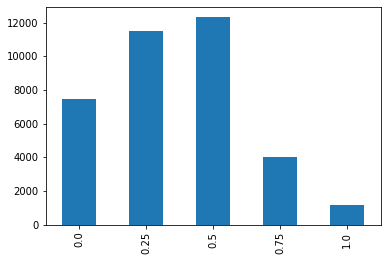

In [ ]:
train_data['score'].value_counts(dropna=False).sort_index().plot.bar()

In [ ]:
def get_cpc_texts():
    contexts = []
    pattern = '[A-Z]\d+'
    for file_name in os.listdir('/content/drive/MyDrive/CPCSchemeXML202208'):
        result = re.findall(pattern, file_name)
        if result:
            contexts.append(result)
    contexts = sorted(set(sum(contexts, [])))
    
    results = {}
    for cpc in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Y']:
        with open(f'/content/drive/MyDrive/titles/cpc-section-{cpc}_20220801.txt') as f:
            s = f.read()
        pattern = f'{cpc}\t\t.+'
        result = re.findall(pattern, s)
        cpc_result = result[0].lstrip(pattern)
        for context in [c for c in contexts if c[0] == cpc]:
            pattern = f'{context}\t\t.+'
            result = re.findall(pattern, s)
            results[context] = cpc_result + ". " + result[0].lstrip(pattern)
    return results

cpc_texts = get_cpc_texts()

train_data['context_text'] = train_data['context'].map(cpc_texts)
test_data['context_text'] = test_data['context'].map(cpc_texts)

In [ ]:
train_data.head()

,id,anchor,target,context,score,context_text
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...


In [ ]:
test_data.head()

,id,anchor,target,context,context_text
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02,PHYSICS. OPTICS
1,09e418c93a776564,adjust gas flow,altering gas flow,F23,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEA...
2,36baf228038e314b,lower trunnion,lower locating,B60,PERFORMING OPERATIONS; TRANSPORTING. VEHICLES ...
3,1f37ead645e7f0c8,cap component,upper portion,D06,TEXTILES; PAPER. TREATMENT OF TEXTILES OR THE ...
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04,ELECTRICITY. ELECTRIC COMMUNICATION TECHNIQUE


In [ ]:
max_len = train_data['target'].str.len().max()
tokenizer = Tokenizer(oov_token="<OOV>")

In [ ]:
max_len

In [ ]:
tokenizer.fit_on_texts(train_data['anchor'])

In [ ]:
def preprocessing(data,max_len):
    anchor_sequences = tokenizer.texts_to_sequences(data['anchor'])
    anchor_pad = pad_sequences(anchor_sequences, padding='post',maxlen = max_len)
    anchor_pad = anchor_pad[...,tf.newaxis].astype('float')
    context_sequences = tokenizer.texts_to_sequences(data['context_text'])
    context_pad = pad_sequences(context_sequences, padding='post',maxlen = max_len)
    context_pad = context_pad[...,tf.newaxis].astype('float')
    
    target_sequences = tokenizer.texts_to_sequences(data['target'])
    target_pad = pad_sequences(target_sequences, padding='post',maxlen = max_len)
    target_pad = target_pad[...,tf.newaxis].astype('float')q
    zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz&²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²²&&zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
aAAAAAaa&&
    a
#     anc = tf.reshape(anchor_pad,[1,anchor_pad.shape[0],anchor_pad.shape[1]])
#     con = tf.reshape(context_pad,[1,context_pad.shape[0],context_pad.shape[1]])
#     tar = tf.reshape(target_pad,[1,target_pad.shape[0],target_pad.shape[1]])

    return anchor_pad,context_pad,target_pad

In [ ]:
anchor_pad,context_pad,target_pad = preprocessing(train_data,max_len = max_len)

In [ ]:
anchor_pad = anchor_pad/np.max(anchor_pad)

In [ ]:
context_pad = context_pad/np.max(context_pad)

In [ ]:
target_pad = target_pad/np.max(target_pad)

In [ ]:
context_pad.shape

(36473, 80, 1)

In [ ]:
target_pad.shape

(36473, 80, 1)

In [ ]:
labels = train_data['score']

In [ ]:
labels = np.array(labels)

In [ ]:
for i in range(len(labels)):
    if labels[i] == 0.25:
        labels[i]=1
        
    if labels[i] == 0.50:
        labels[i]=2
        
    if labels[i] == 0.75:
        labels[i]=3
        
    if labels[i] == 1:
        labels[i]=4

In [ ]:
labels = tf.keras.utils.to_categorical(labels, 5)

In [ ]:
labels.shape

(36473, 5)

In [ ]:
labels

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
def euclideanDistance(layers):
    dist = tf.sqrt(tf.reduce_sum(tf.square(layers[0] - layers[1]), 1))
    return dist

In [ ]:
anchor_input = Input(shape=(80,1),name = 'anchor')
context_input = Input(shape=(80,1),name = 'context')
target_input = Input(shape=(80,1),name = 'target')


anchor_input = Input(shape=(80,1),name = 'anchor')
context_input = Input(shape=(80,1),name = 'context')
target_input = Input(shape=(80,1),name = 'target')

anchor_output = Bidirectional(LSTM(100))(anchor_input)
context_output = Bidirectional(LSTM(100))(context_input)
concatted =Concatenate()([anchor_output,context_output])

norm1 = BatchNormalization()(concatted)

dense1 = Dense(50,activation = 'relu')(norm1)
target_output = Bidirectional(LSTM(50))(target_input)

norm2 = BatchNormalization()(target_output)

dense2 = Dense(50,activation = 'relu')(norm2)

output = Concatenate()([dense1,dense2])

drpt =  Dropout(0.50)(output)

dense3 = Dense(50,activation = 'relu')(drpt)

dense4 = Dense(5,activation = 'softmax')(dense3)

In [ ]:
model = Model(inputs=[anchor_input, context_input,target_input], outputs=dense4)

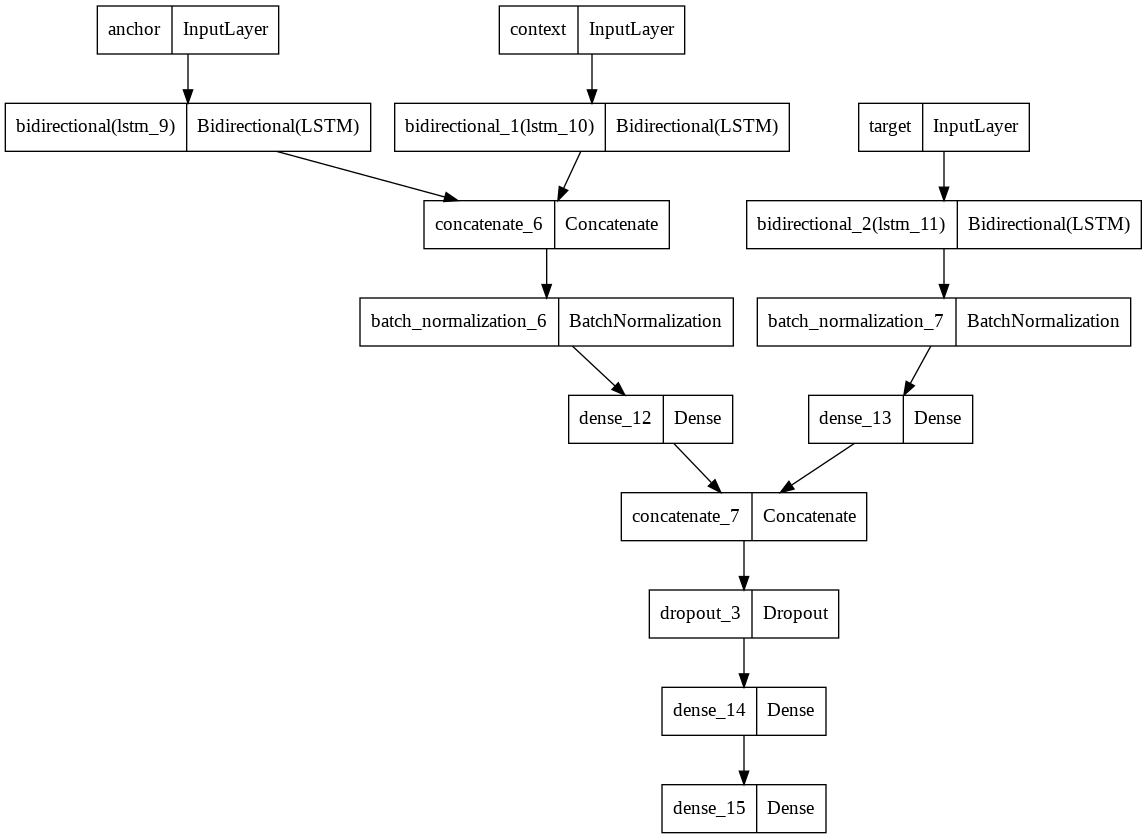

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 anchor (InputLayer)            [(None, 80, 1)]      0           []                               
                                                                                                  
 context (InputLayer)           [(None, 80, 1)]      0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 200)          81600       ['anchor[0][0]']                 
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 200)         81600       ['context[0][0]']                
 )                                                                                          

In [ ]:
inputs = [anchor_pad,context_pad,target_pad]

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics = ['accuracy'], run_eagerly=True)

In [ ]:
history =  model.fit(x=inputs, y =labels, epochs=15,verbose = 0,batch_size  =128)

In [ ]:
history.history

{'loss': [1.2788180112838745,
  1.2761609554290771,
  1.2738982439041138,
  1.27299165725708,
  1.2726589441299438,
  1.2715764045715332,
  1.271016240119934,
  1.271718978881836,
  1.270981788635254,
  1.2701622247695923,
  1.2701101303100586,
  1.2691802978515625,
  1.268410086631775,
  1.2680095434188843,
  1.2673598527908325],
 'accuracy': [0.39900749921798706,
  0.40188631415367126,
  0.39933648705482483,
  0.40040579438209534,
  0.402763694524765,
  0.40147507190704346,
  0.4001590311527252,
  0.40122830867767334,
  0.4019685685634613,
  0.4016944169998169,
  0.40150249004364014,
  0.40218791365623474,
  0.40421682596206665,
  0.40328460931777954,
  0.403503954410553]}